<a href="https://colab.research.google.com/github/MOOwuttichai/BSC_DPDM2023/blob/main/Model_For_text_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# text classification with BERT

In [ ]:
# prompt: ติดตั้ง pythainlp

!pip install pythainlp


In [ ]:
# prompt: เชื่อมไดฟ์
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# prompt: เรียกใช้งาน(/content/drive/MyDrive/เชี่ยงใหม่ (1)/Copy of Data_label_All.xlsx)

import pandas as pd

df = pd.read_excel('/content/drive/MyDrive/เชี่ยงใหม่ (1)/Copy of Data_label_All.xlsx',sheet_name=1)
df1 = pd.read_excel('/content/drive/MyDrive/เชี่ยงใหม่ (1)/Copy of Data_label_All.xlsx',sheet_name=4)

df1.head()


,name,comments,label,จำนวนตัวอักษร
0,ชูวงศ์ กาญจนศร,.,ไม่มีประโยชน์/ไม่สำคัญ (useless/unimportant),1
1,Nittaya Tipsuko,ผ,ไม่มีประโยชน์/ไม่สำคัญ (useless/unimportant),1
2,Wannee Jatawattana,เ,ไม่มีประโยชน์/ไม่สำคัญ (useless/unimportant),1
3,กระดาษ ทราย ยย,อะ,ไม่มีประโยชน์/ไม่สำคัญ (useless/unimportant),3
4,Chen Ccs,สนใจ,ไม่มีประโยชน์/ไม่สำคัญ (useless/unimportant),4


In [ ]:
df_use0 = df[['comments','label']]
df_use1 = df1[['comments','label']]

In [ ]:
print(len(df_use0)+len(df_use1))

3137


In [ ]:
# prompt: นำ df_use1 มาต่อกับ df_use0 เเล้ว Reset_index

frames = [df_use0, df_use1]
result = pd.concat(frames)
result = result.reset_index(drop=True)
print(len(result))
result

3137


,comments,label
0,.,ไม่มีประโยชน์/ไม่สำคัญ (useless/unimportant)
1,.,ไม่มีประโยชน์/ไม่สำคัญ (useless/unimportant)
2,_,ไม่มีประโยชน์/ไม่สำคัญ (useless/unimportant)
3,.,ไม่มีประโยชน์/ไม่สำคัญ (useless/unimportant)
4,.,ไม่มีประโยชน์/ไม่สำคัญ (useless/unimportant)
...,...,...
3132,เคยเป็นตอนช่วงที่ดูแลแม่ในระยะสุดท้ายค่ะ ตื่นเ...,เล่าประสบการณ์ (tell experience)
3133,เคยเป็นตอนนั้นอดนอนสามคืน รู้สึกเลยว่าใจสั่น ...,ไม่มีประโยชน์/ไม่สำคัญ (useless/unimportant)
3134,การตรวจ​เลือดเพื่อดูค่าไทรอยด์​ โพแทสเซียม​ ค่...,เล่าประสบการณ์ (tell experience)
3135,ดิฉันเองตอนเข้ารับการผ่าตัดเอาหนองออกจากต่อมน้...,เล่าประสบการณ์ (tell experience)


In [143]:
# prompt: เซฟ result ออกมาเป็น csv

from google.colab import drive
import pandas as pd
# # text classification with BERT

!pip install pythainlp

drive.mount('/content/drive')


df = pd.read_excel('/content/drive/MyDrive/เชี่ยงใหม่ (1)/Copy of Data_label_All.xlsx',sheet_name=1)
df1 = pd.read_excel('/content/drive/MyDrive/เชี่ยงใหม่ (1)/Copy of Data_label_All.xlsx',sheet_name=4)

df1.head()

df_use0 = df[['comments','label']]
df_use1 = df1[['comments','label']]
print(len(df_use0)+len(df_use1))

frames = [df_use0, df_use1]
result = pd.concat(frames)
result = result.reset_index(drop=True)
print(len(result))
result

# Save the result DataFrame to a CSV file
result.to_csv('result.csv', index=False, encoding='utf-8-sig') #encoding='utf-8-sig' is important for Thai characters

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
3137
3137


## ทำความสะอาดเล็กน้อย

In [145]:
len_count =[]
for i in range(len(result)):
  len_count.append(len(result['comments'][i]))
result['len_count'] = len_count

In [146]:
Data_model = result[result['len_count']>5]

In [147]:
Data_model

,comments,label,len_count
30,ว่าพี่,ไม่มีประโยชน์/ไม่สำคัญ (useless/unimportant),6
31,Ju Jai,ไม่มีประโยชน์/ไม่สำคัญ (useless/unimportant),6
32,Pyn Kt,ไม่มีประโยชน์/ไม่สำคัญ (useless/unimportant),6
33,Jahmal,ไม่มีประโยชน์/ไม่สำคัญ (useless/unimportant),6
34,Pum Pui,ไม่มีประโยชน์/ไม่สำคัญ (useless/unimportant),7
...,...,...,...
3132,เคยเป็นตอนช่วงที่ดูแลแม่ในระยะสุดท้ายค่ะ ตื่นเ...,เล่าประสบการณ์ (tell experience),267
3133,เคยเป็นตอนนั้นอดนอนสามคืน รู้สึกเลยว่าใจสั่น ...,ไม่มีประโยชน์/ไม่สำคัญ (useless/unimportant),267
3134,การตรวจ​เลือดเพื่อดูค่าไทรอยด์​ โพแทสเซียม​ ค่...,เล่าประสบการณ์ (tell experience),267
3135,ดิฉันเองตอนเข้ารับการผ่าตัดเอาหนองออกจากต่อมน้...,เล่าประสบการณ์ (tell experience),267


In [148]:
Data_model.to_csv('Data_model.csv', index=False, encoding='utf-8-sig')

<ipython-input-94-e0b9dc6a806a>:16: UserWarning: Glyph 3652 (\N{THAI CHARACTER SARA AI MAIMALAI}) missing from current font.
  plt.tight_layout()
<ipython-input-94-e0b9dc6a806a>:16: UserWarning: Glyph 3617 (\N{THAI CHARACTER MO MA}) missing from current font.
  plt.tight_layout()
<ipython-input-94-e0b9dc6a806a>:16: UserWarning: Glyph 3656 (\N{THAI CHARACTER MAI EK}) missing from current font.
  plt.tight_layout()
<ipython-input-94-e0b9dc6a806a>:16: UserWarning: Glyph 3637 (\N{THAI CHARACTER SARA II}) missing from current font.
  plt.tight_layout()
<ipython-input-94-e0b9dc6a806a>:16: UserWarning: Glyph 3611 (\N{THAI CHARACTER PO PLA}) missing from current font.
  plt.tight_layout()
<ipython-input-94-e0b9dc6a806a>:16: UserWarning: Glyph 3619 (\N{THAI CHARACTER RO RUA}) missing from current font.
  plt.tight_layout()
<ipython-input-94-e0b9dc6a806a>:16: UserWarning: Glyph 3632 (\N{THAI CHARACTER SARA A}) missing from current font.
  plt.tight_layout()
<ipython-input-94-e0b9dc6a806a>:16: Us

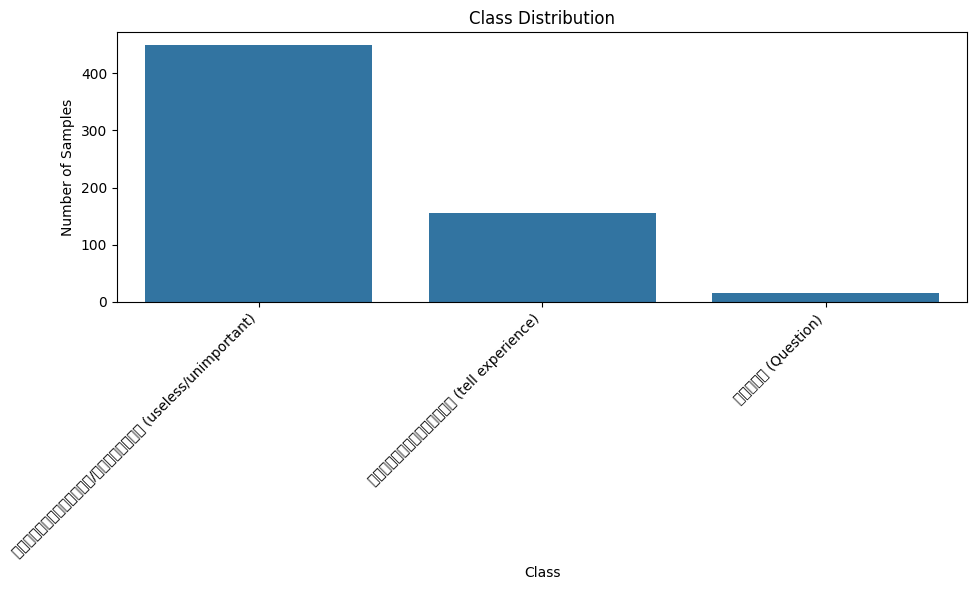

In [ ]:
# prompt: ช่วยทำแผนภูมิเเท่งเปรียบเทียบแต่ละ class ในคอลัม label

import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each class in the 'label' column
class_counts =test_df['label'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [ ]:
# prompt: ต้องการแบ่ง Train/Test set เป็น 80/20

from sklearn.model_selection import train_test_split

# Assuming 'Data_model' is your DataFrame
train_df, test_df = train_test_split(Data_model, test_size=0.2, random_state=42) # 80/20 split, random_state for reproducibility

print("Training set size:", len(train_df))
print("Testing set size:", len(test_df))

# Now you have train_df and test_df for training and testing, respectively.

Training set size: 2478
Testing set size: 620


In [ ]:
from pythainlp import word_tokenize
from pythainlp.corpus import thai_stopwords
def text_process(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":", "!", '"', "ๆ", "ฯ","-"))
    final = word_tokenize(final)
    final = " ".join(word for word in final)
    final = " ".join(word for word in final.split()
                     if word.lower not in thai_stopwords())
    # final = list(final.split(' '))
    return final
train_df['text_tokens'] = train_df['comments'].apply(text_process)
train_df

,comments,label,len_count,text_tokens
2627,เป็นอยู่ค่ะ เป็นๆหายๆ,ไม่มีประโยชน์/ไม่สำคัญ (useless/unimportant),21,เป็นอยู่ ค่ะ เป็น หาย
2780,เอาไว้ดูแลตัวเอง....ขอบคุณค่ะ,ไม่มีประโยชน์/ไม่สำคัญ (useless/unimportant),29,เอาไว้ ดูแลตัวเอง ขอบคุณ ค่ะ
1991,อดีตเคยเป็นมะเร็งที่โพรงมดลูกระยะที่ 1 เลือกที...,เล่าประสบการณ์ (tell experience),417,อดีต เคย เป็น มะเร็ง ที่ โพรง มดลูก ระยะ ที่ 1...
2556,ปรีดา วงศ์วัชรัตน์,ไม่มีประโยชน์/ไม่สำคัญ (useless/unimportant),18,ปรีดา วงศ์ วัช รัตน์
2422,Suthanee Minako,ไม่มีประโยชน์/ไม่สำคัญ (useless/unimportant),15,Suthanee Minako
...,...,...,...,...
3131,"แม่อายุ82เป็นลมน๊อคหมดสติไป5-10นาที,จนอสม.บอกห...",เล่าประสบการณ์ (tell experience),267,"แม่ อายุ 82 เป็นลม น๊อค หมดสติ ไป 510 นาที , จ..."
1125,Roong N. RueangcharoenthumKong N'Wongwanich,ไม่มีประโยชน์/ไม่สำคัญ (useless/unimportant),43,Roong N RueangcharoenthumKong N 'Wongwanich
1160,SiwaLee Usap เล่ามะเร็งไตของผมเป็นวิทยาทานหน่อย,ไม่มีประโยชน์/ไม่สำคัญ (useless/unimportant),47,SiwaLee Usap เล่า มะเร็ง ไต ของ ผม เป็น วิทยาท...
1324,เราสามารถเข้าไปตรวจแม้จะไม่มีอาการอะไรได้ไหมคะ...,คำถาม (Question),85,เรา สามารถ เข้าไป ตรวจ แม้ จะ ไม่ มี อาการ อะไ...


In [ ]:
X_train = train_df[['comments', 'text_tokens']]
y_train = train_df['label']
X_test = test_df['comments']  # Changed from X_train to X_test
y_test = test_df['label']  # Changed from y_train to y_test

In [ ]:
X_test

,comments
1977,พบก้อนเนื้อที่คอเหมือนคนคอพอก เห็นด้วยตาป่าวว่...
1339,เหนื่อยง่ายมากกว่าปกติฉี่บ่อยๆกลางคืนเปนภุมิแพ...
1636,เคยเป็นมะเร็งจมูก สมอง ระยะ4น่าจะเกิดจากสารเคม...
2666,Lingnoii Nueangjumnong
2480,Maylada Taekasem
...,...
2408,ณัฐพล วงษ์วานิช
1948,15ปีที่แล้วค่ะ สามี ทำงาน กิน นอน เครียด บินบ่...
1067,พ่อเป็นมะเร็งตับเพิ่งเสียมค ปีนี้ค่ะ
2844,ขออนุญาตแบ่งปันนะคะ...ขอบคุณค่ะ...


In [ ]:
test_df['text_tokens'] = test_df['comments'].apply(text_process)

In [ ]:
X_test = test_df[['comments', 'text_tokens']]
X_test

,comments,text_tokens
1977,พบก้อนเนื้อที่คอเหมือนคนคอพอก เห็นด้วยตาป่าวว่...,พบ ก้อน เนื้อที่ คอ เหมือน คน คอพอก เห็นด้วย ต...
1339,เหนื่อยง่ายมากกว่าปกติฉี่บ่อยๆกลางคืนเปนภุมิแพ...,เหนื่อย ง่าย มากกว่า ปกติ ฉี่ บ่อย กลางคืน เปน...
1636,เคยเป็นมะเร็งจมูก สมอง ระยะ4น่าจะเกิดจากสารเคม...,เคย เป็น มะเร็ง จมูก สมอง ระยะ 4 น่าจะ เกิด จา...
2666,Lingnoii Nueangjumnong,Lingnoii Nueangjumnong
2480,Maylada Taekasem,Maylada Taekasem
...,...,...
2408,ณัฐพล วงษ์วานิช,ณัฐพล วงษ์ วานิช
1948,15ปีที่แล้วค่ะ สามี ทำงาน กิน นอน เครียด บินบ่...,15 ปี ที่แล้ว ค่ะ สามี ทำงาน กิน นอน เครียด บิ...
1067,พ่อเป็นมะเร็งตับเพิ่งเสียมค ปีนี้ค่ะ,พ่อ เป็น มะเร็ง ตับ เพิ่ง เสียม ค ปี นี้ ค่ะ
2844,ขออนุญาตแบ่งปันนะคะ...ขอบคุณค่ะ...,ขออนุญาต แบ่งปัน นะคะ ขอบคุณ ค่ะ


## Word Vectorizer และ Bag-of-Words (BoW)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(analyzer=lambda x:x.split(' '))
cvec.fit_transform(X_train['text_tokens'])
cvec.vocabulary_

{'เป็นอยู่': 6472,
 'ค่ะ': 3374,
 'เป็น': 6439,
 'หาย': 5880,
 'เอาไว้': 6772,
 'ดูแลตัวเอง': 3732,
 'ขอบคุณ': 3087,
 'อดีต': 5921,
 'เคย': 6218,
 'มะเร็ง': 4893,
 'ที่': 4092,
 'โพรง': 7070,
 'มดลูก': 4859,
 'ระยะ': 5146,
 '1': 81,
 'เลือก': 6635,
 'รักษา': 5157,
 'โดย': 7037,
 'การ': 2924,
 'ตัด': 3807,
 'และ': 6970,
 'ต่อมน้ำเหลือง': 3911,
 'บริเวณ': 4369,
 'รอบ': 5126,
 'ทิ้ง': 4081,
 'อาการ': 6014,
 'เริ่ม': 6591,
 'แรกเกิด': 6956,
 'จาก': 3452,
 'ประจำเดือน': 4466,
 'มา': 4911,
 'มาก': 4912,
 'ผิดปกติ': 4628,
 'เลย': 6618,
 'รีบ': 5212,
 'ไป': 7233,
 'พบ': 4680,
 'แพทย์': 6933,
 'คุณหมอ': 3356,
 'มี': 4934,
 'ข้อสงสัย': 3140,
 'ว่า': 5477,
 'อาจจะ': 6020,
 'หลังจากนั้น': 5833,
 'ได้': 7215,
 'ขูด': 3131,
 'นำ': 4256,
 'ผล': 4602,
 'ชิ้น': 3573,
 'เนื้อ': 6383,
 'วินิจฉัย': 5454,
 'จึง': 3481,
 'หลังจากที่': 5832,
 'ผ่าตัด': 4654,
 'ภายใน': 4837,
 '2': 117,
 'สัปดาห์': 5607,
 'ซึ่ง': 3645,
 'ดิฉัน': 3697,
 'ผ่า': 4653,
 'ตัดผ่าน': 3810,
 'แล้ว': 6972,
 'เกือบ': 6179,
 '10': 82,
 '

In [ ]:
train_bow = cvec.transform(X_train['text_tokens'])

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bow, y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
test_bow = cvec.transform(X_test['text_tokens'])
test_predictions = lr.predict(test_bow)
Model_Evaluation_LOG=classification_report(test_predictions, y_test)

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 3588 (\N{THAI CHARACTER KHO KHWAI}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 3635 (\N{THAI CHARACTER SARA AM}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 3606 (\N{THAI CHARACTER THO THUNG}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 3634 (\N{THAI CHARACTER SARA AA}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 3617 (\N{THAI CHARACTER MO MA}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 3648 (\N{THAI CHARACTER SARA E}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-pa

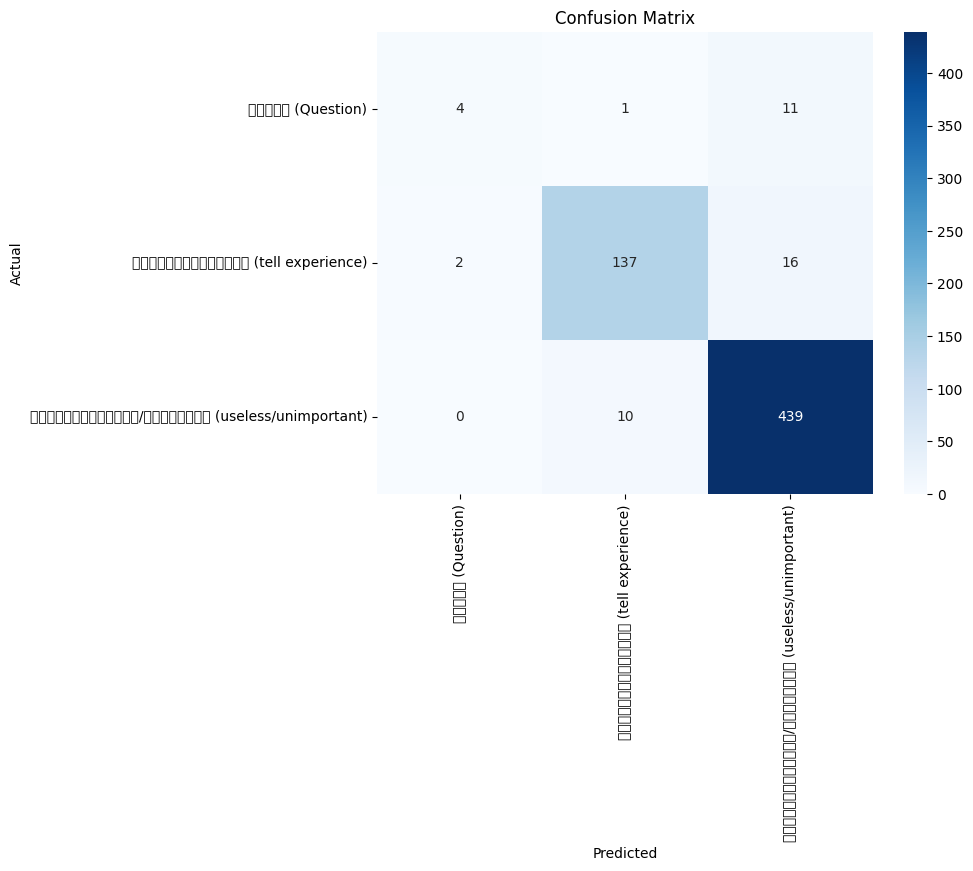

'                                              precision    recall  f1-score   support\n\n                            คำถาม (Question)       0.25      0.67      0.36         6\n            เล่าประสบการณ์ (tell experience)       0.88      0.93      0.90       148\nไม่มีประโยชน์/ไม่สำคัญ (useless/unimportant)       0.98      0.94      0.96       466\n\n                                    accuracy                           0.94       620\n                                   macro avg       0.70      0.84      0.74       620\n                                weighted avg       0.95      0.94      0.94       620\n'

In [ ]:
# prompt: ช่วยสร้างกราฟที่เหมาะสมกับ Model Evaluation ของตัวเเปร Model_Evaluation_LOG

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming 'y_test' and 'test_predictions' are defined from your previous code
cm = confusion_matrix(y_test, test_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(y_test.unique()),
            yticklabels=sorted(y_test.unique()))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Model_Evaluation_LOG

In [ ]:
# prompt: Model_Evaluation_LOG ช่วยเเสดงค่า ความเเม่นย่ำ

print(Model_Evaluation_LOG)

                                              precision    recall  f1-score   support

                            คำถาม (Question)       0.25      0.67      0.36         6
            เล่าประสบการณ์ (tell experience)       0.88      0.93      0.90       148
ไม่มีประโยชน์/ไม่สำคัญ (useless/unimportant)       0.98      0.94      0.96       466

                                    accuracy                           0.94       620
                                   macro avg       0.70      0.84      0.74       620
                                weighted avg       0.95      0.94      0.94       620



In [ ]:
my_text = 'เเนะนำหน่อยค่ะหากต้องการไปรักษาโรคมะเร็งปอดต้องไปที่โรงพยาบาลไหนครับ?'
my_tokens = text_process(my_text)
my_bow = cvec.transform(pd.Series([my_tokens]))
my_predictions = lr.predict(my_bow)
my_predictions

array(['คำถาม (Question)'], dtype=object)

#

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(analyzer=lambda x:x.split(' '))
cvec.fit_transform(X_train['text_tokens'])
cvec.vocabulary_

In [ ]:
train_bow = cvec.transform(train_df['text_tokens'])

['เป็นอยู่', 'ค่ะ', 'เป็น', 'หาย']

###----------###


In [ ]:
from transformers import AutoTokenizer
# Load Distilbert Tokenizer
model_ckpt = "airesearch/wangchanberta-base-att-spm-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
# Encode Our Example Text
encoded_text = tokenizer("สวัสดีครับชาวโลก")
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(encoded_text,len(encoded_text.input_ids))
print(tokens)

{'input_ids': [5, 10, 5533, 15873, 6], 'attention_mask': [1, 1, 1, 1, 1]} 5
['<s>', '▁', 'สวัสดีครับ', 'ชาวโลก', '</s>']


In [ ]:
from transformers import AutoModel
from transformers import AutoTokenizer
import torch
model_ckpt = "airesearch/wangchanberta-base-att-spm-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("device: ",device)
model = AutoModel.from_pretrained(model_ckpt).to(device)

device:  cpu


In [ ]:
# prompt: ช่วยทำ Extract Hidden States ของข้อมูลใน result

from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.combine import SMOTETomek
from transformers import AutoTokenizer, AutoModel
import torch
import time
# Function to extract hidden states
def extract_hidden_states(text):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512).to(device)
    with torch.no_grad():
        outputs = model(**inputs, output_hidden_states=True)
    hidden_states = outputs.hidden_states
    return hidden_states[-1][:, 0, :].cpu().numpy() # Extract the [CLS] token's hidden state

# Apply the function to the 'comments' column
hidden_states_list = []
try:
  for i in range(len(result)):
    hidden_states_list.append(extract_hidden_states(train_df['comments'][i]))
    time.sleep(1)
    print(f"Success {i}")
except:
  print(result['comments'])
  print("Error")
# result['hidden_states'] = result['comments'].apply(extract_hidden_states)
# Now 'result' DataFrame contains a new column 'hidden_states'
# with the extracted hidden states for each comment.
# print(result.head())

Success 0
Success 1
Success 2
Success 3
Success 4
Success 5
Success 6
Success 7
Success 8
Success 9
Success 10
Success 11
Success 12
Success 13
Success 14
Success 15
Success 16
Success 17
Success 18
Success 19
Success 20
Success 21
Success 22
Success 23
Success 24
Success 25
Success 26
Success 27
Success 28
Success 29
Success 30
Success 31
Success 32
Success 33
Success 34
Success 35
Success 36
Success 37
Success 38
Success 39
Success 40
Success 41
Success 42
Success 43
Success 44
Success 45
Success 46
Success 47
Success 48
Success 49
Success 50
Success 51
Success 52
Success 53
Success 54
Success 55
Success 56
Success 57
Success 58
Success 59
Success 60
Success 61
Success 62
Success 63
Success 64
Success 65
Success 66
Success 67
Success 68
Success 69
Success 70
Success 71
Success 72
Success 73
Success 74
Success 75
Success 76
Success 77
Success 78
Success 79
Success 80
Success 81
Success 82
Success 83
Success 84
Success 85
Success 86
Success 87
Success 88
Success 89
Success 90
Success 9

In [ ]:
len(result['comments'][2118])

2016

In [ ]:
max(train_df['len_count'])

2486

In [ ]:
tokenizer.vocab_size

25005